In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import tensorflow as tf
from nltk.corpus import stopwords
import seaborn as sns
import re
import spacy
import sklearn
from textblob import TextBlob
from textblob import Word

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Importing datasets
data1 = pd.read_csv('Daylio_Abid.csv')
df = pd.DataFrame(data1)
data2 = pd.read_csv('sleepDay_merged.csv')
df2 = pd.DataFrame(data2)
data3 = pd.read_csv('labels.csv')
df3 = pd.DataFrame(data3)

In [3]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [4]:
df2.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
df3.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [6]:
df.describe()

,full_date,date,weekday,time,sub_mood,activities,mood
count,940,940,940,940,940,893,940
unique,775,366,7,425,22,839,5
top,07/02/2018,Mar-01,Tuesday,9:00 pm,blessed,Dota 2,Good
freq,4,7,139,65,174,10,487


In [7]:
df2.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [8]:
df3.describe()

,Unnamed: 0
count,6992.000000
mean,3495.500000
std,2018.560873
min,0.000000
25%,1747.750000
50%,3495.500000
75%,5243.250000
max,6991.000000


In [9]:
df.isnull().sum()

full_date      0
date           0
weekday        0
time           0
sub_mood       0
activities    47
mood           0
dtype: int64

In [10]:
df2.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [11]:
df3.isnull().sum()

Unnamed: 0             0
image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
dtype: int64

In [12]:
new_data1 = df.dropna()
new_data2 = df2.dropna()
new_data3 = df3.dropna()

In [13]:
new_data1

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful


In [14]:
new_data2

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [15]:
new_data3

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [16]:
new_data1.isnull().sum()

full_date     0
date          0
weekday       0
time          0
sub_mood      0
activities    0
mood          0
dtype: int64

In [17]:
new_data2.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [18]:
new_data3.isnull().sum()

Unnamed: 0           0
image_name           0
text_ocr             0
text_corrected       0
humour               0
sarcasm              0
offensive            0
motivational         0
overall_sentiment    0
dtype: int64

In [19]:
concat_data = pd.concat([new_data1,new_data2],axis=1)
concat_data

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,327.0,346.0
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,384.0,407.0
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,412.0,442.0
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,340.0,367.0
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,700.0,712.0
...,...,...,...,...,...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good,NaN,NaN,NaN,NaN,NaN
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal,NaN,NaN,NaN,NaN,NaN
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good,NaN,NaN,NaN,NaN,NaN
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful,NaN,NaN,NaN,NaN,NaN


In [20]:
combined_data = pd.concat([concat_data,new_data3],axis=1)
combined_data

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,TotalTimeInBed,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,346.0,0.0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,407.0,1.0,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,442.0,2.0,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,367.0,3.0,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,712.0,4.0,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6987.0,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6988.0,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6989.0,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6990.0,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [21]:
combined_data.isnull().sum()

full_date             5949
date                  5949
weekday               5949
time                  5949
sub_mood              5949
activities            5949
mood                  5949
Id                    6429
SleepDay              6429
TotalSleepRecords     6429
TotalMinutesAsleep    6429
TotalTimeInBed        6429
Unnamed: 0              12
image_name              12
text_ocr                12
text_corrected          12
humour                  12
sarcasm                 12
offensive               12
motivational            12
overall_sentiment       12
dtype: int64

In [22]:
final = combined_data.dropna()
final

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,TotalTimeInBed,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,346.0,0.0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,407.0,1.0,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,442.0,2.0,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,367.0,3.0,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,712.0,4.0,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,10/03/2020,Mar-10,Tuesday,9:00 pm,over the moon,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,4/30/2016 12:00:00 AM,1.0,...,360.0,408.0,image_409.jpg,This is Bill Bill has a wife. Bill isn't the p...,This is Bill Bill has a wife. Bill isn't the p...,not_funny,not_sarcastic,not_offensive,not_motivational,neutral
409,09/03/2020,Mar-09,Monday,9:05 pm,excited,Write dairy | prayer | fasting | walk | medi...,Amazing,8.792010e+09,5/1/2016 12:00:00 AM,1.0,...,527.0,409.0,image_410.png,Why Bills never go on Sale like Rent 50% off o...,Why Bills never go on Sale like Rent 50% off o...,very_funny,twisted_meaning,not_offensive,not_motivational,very_positive
410,08/03/2020,Mar-08,Sunday,9:01 pm,excited,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,5/2/2016 12:00:00 AM,1.0,...,423.0,410.0,image_411.jpeg,ME: I don't wanna go to work BILLS: bitch bett...,ME: I don't wanna go to work BILLS: bitch bett...,funny,general,slight,not_motivational,positive
411,07/03/2020,Mar-07,Saturday,9:00 pm,excited,prayer | fasting | walk | meditation | podca...,Amazing,8.792010e+09,5/3/2016 12:00:00 AM,1.0,...,545.0,411.0,image_412.jpg,DID SOMEBODY ASK FOR THE BILLE!,DID SOMEBODY ASK FOR THE BILL?!,very_funny,twisted_meaning,very_offensive,not_motivational,neutral


In [23]:
final.columns

Index(['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities',
       'mood', 'Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Unnamed: 0', 'image_name', 'text_ocr',
       'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational',
       'overall_sentiment'],
      dtype='object')

In [24]:
final.shape

(406, 21)

In [25]:
final['mood'].value_counts()

Good       184
Amazing     93
Normal      84
Bad         23
Awful       22
Name: mood, dtype: int64

In [26]:
final['overall_sentiment'].value_counts()

positive         182
neutral          129
very_positive     65
negative          19
very_negative     11
Name: overall_sentiment, dtype: int64

In [27]:
sleep_value = final['TotalMinutesAsleep'].value_counts()
selected_sleep_value = sleep_value.loc[sleep_value.index>=420.0]
selected_sleep_value

442.0    7
441.0    5
439.0    4
531.0    4
433.0    4
        ..
651.0    1
479.0    1
431.0    1
476.0    1
600.0    1
Name: TotalMinutesAsleep, Length: 133, dtype: int64

In [28]:
s_label1 = final.mood.factorize()
s_label1

(array([0, 0, 1, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 3, 1, 3, 4, 0, 4, 3, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 1, 0, 0, 3, 3, 0, 2, 0, 0, 1, 0, 0,
        0, 3, 0, 1, 3, 3, 0, 0, 3, 3, 0, 1, 3, 3, 0, 0, 3, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 2, 0, 0, 4, 0, 4, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        2, 0, 0, 1, 0, 0, 0, 0, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1,
        0, 0, 4, 2, 4, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 3, 3, 3, 3,
        0, 0, 0, 1, 2, 0, 1, 1, 4, 2, 1, 1, 2, 1, 0, 1, 0, 4, 4, 4, 2, 1,
        2, 2, 4, 1, 2, 1, 4, 1, 1, 1, 0, 0, 2, 4, 2, 4, 0, 1, 1, 0, 1, 2,
        0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0,
        1, 2, 1, 0, 0, 0, 1, 3, 1, 3, 

In [29]:
s_label2 = final.overall_sentiment.factorize()
s_label2

(array([0, 0, 1, 1, 2, 3, 3, 2, 1, 1, 3, 0, 1, 1, 4, 2, 1, 0, 1, 1, 2, 1,
        2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,
        2, 1, 1, 1, 3, 1, 1, 2, 1, 0, 2, 1, 1, 1, 4, 0, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1,
        1, 4, 0, 1, 3, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 3, 2, 1, 0,
        1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2,
        2, 4, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 0, 1, 2, 2, 2, 2, 2,
        1, 3, 1, 1, 1, 1, 2, 3, 0, 1, 0, 3, 1, 1, 4, 1, 2, 1, 1, 0, 1, 3,
        2, 1, 1, 2, 0, 4, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2,
        4, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1,
        2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 3, 0, 1, 0, 2, 0, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 4, 0, 0,
        3, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 4, 2, 2, 1, 1, 2, 2, 2, 1, 1,
        2, 4, 1, 1, 1, 1, 0, 0, 1, 1, 

In [30]:
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [31]:
stemmed = final['text_corrected'].apply(stemmer)
cf = pd.DataFrame(stemmed)
cf

,text_corrected
0,look there my friend lightyear now all sohalik...
1,the best of #10 yearchallenge! complet in less...
2,sam thorn @strippin ( follow follow saw everyo...
3,10 year challeng - sweet dee edit
4,10 year challeng with no filter 47 hilari 10 y...
...,...
408,thi is bill bill ha a wife. bill isn't the per...
409,whi bill never go on sale like rent 50% off or...
410,me: i don't wanna go to work bills: bitch bett...
411,did somebodi ask for the bill?!


In [32]:
final = final.assign(B=cf['text_corrected'])
final['text_corrected']

0      LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1      The best of #10 YearChallenge! Completed in le...
2      Sam Thorne @Strippin ( Follow Follow Saw every...
3                  10 Year Challenge - Sweet Dee Edition
4      10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                             ...                        
408    This is Bill Bill has a wife. Bill isn't the p...
409    Why Bills never go on Sale like Rent 50% off o...
410    ME: I don't wanna go to work BILLS: bitch bett...
411                      DID SOMEBODY ASK FOR THE BILL?!
412    I TOLD THEM BLACK CULTURE WAS TO BLAME I DIDNT...
Name: text_corrected, Length: 406, dtype: object

In [33]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

In [34]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [35]:
def removing_stopwords(text,is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [i.strip() for i in tokens]
    if is_lower_case:
        filtokens = [i for i in tokens if token not in english_stop_words]
    else:
        filtokens = [i for i in tokens if i.lower() not in english_stop_words]
    
    filtered_texts = ' '.join(filtokens)
    return filtered_texts
    

In [36]:
removed = final['text_corrected'].apply(removing_stopwords)
cf1 = pd.DataFrame(removed)
cf1

,text_corrected
0,LOOK FRIEND LIGHTYEAR SOHALIKUT TREND PLAY 10 ...
1,best #10 YearChallenge ! Completed less 4 year...
2,Sam Thorne @Strippin ( Follow Follow Saw every...
3,10 Year Challenge - Sweet Dee Edition
4,10 YEAR CHALLENGE FILTER 47 Hilarious 10 Year ...
...,...
408,Bill Bill wife. Bill ' perfect husband ' best ...
409,Bills never go Sale like Rent 50 % buy 1 Light...
410,: ' wanna go work BILLS : bitch better money
411,SOMEBODY ASK BILL ? !


In [37]:
final = final.assign(B=cf1['text_corrected'])
final['text_corrected']

0      LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1      The best of #10 YearChallenge! Completed in le...
2      Sam Thorne @Strippin ( Follow Follow Saw every...
3                  10 Year Challenge - Sweet Dee Edition
4      10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                             ...                        
408    This is Bill Bill has a wife. Bill isn't the p...
409    Why Bills never go on Sale like Rent 50% off o...
410    ME: I don't wanna go to work BILLS: bitch bett...
411                      DID SOMEBODY ASK FOR THE BILL?!
412    I TOLD THEM BLACK CULTURE WAS TO BLAME I DIDNT...
Name: text_corrected, Length: 406, dtype: object

In [38]:
def remove_punctuations(text):
    import string
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

final['text_corrected'] = final['text_corrected'].apply(remove_punctuations)

In [39]:
final['text_corrected']

0      LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1      The best of 10 YearChallenge Completed in less...
2      Sam Thorne Strippin  Follow Follow Saw everyon...
3                   10 Year Challenge  Sweet Dee Edition
4      10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                             ...                        
408    This is Bill Bill has a wife Bill isnt the per...
409    Why Bills never go on Sale like Rent 50 off or...
410    ME I dont wanna go to work BILLS bitch better ...
411                        DID SOMEBODY ASK FOR THE BILL
412    I TOLD THEM BLACK CULTURE WAS TO BLAME I DIDNT...
Name: text_corrected, Length: 406, dtype: object

In [40]:
final.shape

(406, 22)

In [41]:
final['sentiment'] = final['text_corrected'].apply(lambda x: TextBlob(x).sentiment)
final['sentiment']

0                                       (0.0, 0.0)
1        (0.4166666666666667, 0.18333333333333332)
2                                       (0.0, 0.0)
3                                     (0.35, 0.65)
4                                       (0.5, 1.0)
                          ...                     
408                                    (1.0, 0.65)
409                                    (0.4, 0.75)
410                                     (0.5, 0.5)
411                                     (0.0, 0.0)
412    (-0.16666666666666666, 0.43333333333333335)
Name: sentiment, Length: 406, dtype: object

In [42]:
sentiment_list = final['sentiment'].tolist()
sentiment_list
s = pd.DataFrame(sentiment_list,columns=['Polarity','Subjectivity'],index=final.index)

In [43]:
final_2 = pd.concat([final,s],axis=1)
final_2

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment,B,sentiment,Polarity,Subjectivity
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive,LOOK FRIEND LIGHTYEAR SOHALIKUT TREND PLAY 10 ...,"(0.0, 0.0)",0.000000,0.000000
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,The best of 10 YearChallenge Completed in less...,not_funny,general,not_offensive,motivational,very_positive,best #10 YearChallenge ! Completed less 4 year...,"(0.4166666666666667, 0.18333333333333332)",0.416667,0.183333
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,Sam Thorne Strippin Follow Follow Saw everyon...,very_funny,not_sarcastic,not_offensive,not_motivational,positive,Sam Thorne @Strippin ( Follow Follow Saw every...,"(0.0, 0.0)",0.000000,0.000000
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,10 Year Challenge Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive,10 Year Challenge - Sweet Dee Edition,"(0.35, 0.65)",0.350000,0.650000
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral,10 YEAR CHALLENGE FILTER 47 Hilarious 10 Year ...,"(0.5, 1.0)",0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,10/03/2020,Mar-10,Tuesday,9:00 pm,over the moon,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,4/30/2016 12:00:00 AM,1.0,...,This is Bill Bill has a wife Bill isnt the per...,not_funny,not_sarcastic,not_offensive,not_motivational,neutral,Bill Bill wife. Bill ' perfect husband ' best ...,"(1.0, 0.65)",1.000000,0.650000
409,09/03/2020,Mar-09,Monday,9:05 pm,excited,Write dairy | prayer | fasting | walk | medi...,Amazing,8.792010e+09,5/1/2016 12:00:00 AM,1.0,...,Why Bills never go on Sale like Rent 50 off or...,very_funny,twisted_meaning,not_offensive,not_motivational,very_positive,Bills never go Sale like Rent 50 % buy 1 Light...,"(0.4, 0.75)",0.400000,0.750000
410,08/03/2020,Mar-08,Sunday,9:01 pm,excited,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,5/2/2016 12:00:00 AM,1.0,...,ME I dont wanna go to work BILLS bitch better ...,funny,general,slight,not_motivational,positive,: ' wanna go work BILLS : bitch better money,"(0.5, 0.5)",0.500000,0.500000
411,07/03/2020,Mar-07,Saturday,9:00 pm,excited,prayer | fasting | walk | meditation | podca...,Amazing,8.792010e+09,5/3/2016 12:00:00 AM,1.0,...,DID SOMEBODY ASK FOR THE BILL,very_funny,twisted_meaning,very_offensive,not_motivational,neutral,SOMEBODY ASK BILL ? !,"(0.0, 0.0)",0.000000,0.000000


In [44]:
final_2.columns

Index(['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities',
       'mood', 'Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Unnamed: 0', 'image_name', 'text_ocr',
       'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational',
       'overall_sentiment', 'B', 'sentiment', 'Polarity', 'Subjectivity'],
      dtype='object')

In [45]:
final_2.dropna(axis=1)

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment,B,sentiment,Polarity,Subjectivity
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive,LOOK FRIEND LIGHTYEAR SOHALIKUT TREND PLAY 10 ...,"(0.0, 0.0)",0.000000,0.000000
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,The best of 10 YearChallenge Completed in less...,not_funny,general,not_offensive,motivational,very_positive,best #10 YearChallenge ! Completed less 4 year...,"(0.4166666666666667, 0.18333333333333332)",0.416667,0.183333
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,Sam Thorne Strippin Follow Follow Saw everyon...,very_funny,not_sarcastic,not_offensive,not_motivational,positive,Sam Thorne @Strippin ( Follow Follow Saw every...,"(0.0, 0.0)",0.000000,0.000000
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,10 Year Challenge Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive,10 Year Challenge - Sweet Dee Edition,"(0.35, 0.65)",0.350000,0.650000
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral,10 YEAR CHALLENGE FILTER 47 Hilarious 10 Year ...,"(0.5, 1.0)",0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,10/03/2020,Mar-10,Tuesday,9:00 pm,over the moon,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,4/30/2016 12:00:00 AM,1.0,...,This is Bill Bill has a wife Bill isnt the per...,not_funny,not_sarcastic,not_offensive,not_motivational,neutral,Bill Bill wife. Bill ' perfect husband ' best ...,"(1.0, 0.65)",1.000000,0.650000
409,09/03/2020,Mar-09,Monday,9:05 pm,excited,Write dairy | prayer | fasting | walk | medi...,Amazing,8.792010e+09,5/1/2016 12:00:00 AM,1.0,...,Why Bills never go on Sale like Rent 50 off or...,very_funny,twisted_meaning,not_offensive,not_motivational,very_positive,Bills never go Sale like Rent 50 % buy 1 Light...,"(0.4, 0.75)",0.400000,0.750000
410,08/03/2020,Mar-08,Sunday,9:01 pm,excited,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,5/2/2016 12:00:00 AM,1.0,...,ME I dont wanna go to work BILLS bitch better ...,funny,general,slight,not_motivational,positive,: ' wanna go work BILLS : bitch better money,"(0.5, 0.5)",0.500000,0.500000
411,07/03/2020,Mar-07,Saturday,9:00 pm,excited,prayer | fasting | walk | meditation | podca...,Amazing,8.792010e+09,5/3/2016 12:00:00 AM,1.0,...,DID SOMEBODY ASK FOR THE BILL,very_funny,twisted_meaning,very_offensive,not_motivational,neutral,SOMEBODY ASK BILL ? !,"(0.0, 0.0)",0.000000,0.000000


In [46]:
final_2.columns

Index(['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities',
       'mood', 'Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Unnamed: 0', 'image_name', 'text_ocr',
       'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational',
       'overall_sentiment', 'B', 'sentiment', 'Polarity', 'Subjectivity'],
      dtype='object')

In [47]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

for index,row in final_2['text_corrected'].iteritems():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    
    if neg>pos:
        final_2.loc[index,'Sentiment'] = "Negative"
    elif pos>neg:
        final_2.loc[index,'Sentiment'] = "Positive"
    else:
        final_2.loc[index,'Sentiment'] = "Neutral"

In [48]:
final_2.columns

Index(['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities',
       'mood', 'Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Unnamed: 0', 'image_name', 'text_ocr',
       'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational',
       'overall_sentiment', 'B', 'sentiment', 'Polarity', 'Subjectivity',
       'Sentiment'],
      dtype='object')

In [50]:
final_2.loc[final_2['Sentiment']=="Positive",'Sentiment_Label'] = 1
final_2.loc[final_2['Sentiment']=="Negative",'Sentiment_Label'] = -1
final_2.loc[final_2['Sentiment']=="Neutral",'Sentiment_Label'] = 0

In [51]:
dict = {'Sentiment_Label':int}

final_2.astype(dict)

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,sarcasm,offensive,motivational,overall_sentiment,B,sentiment,Polarity,Subjectivity,Sentiment,Sentiment_Label
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,general,not_offensive,not_motivational,very_positive,LOOK FRIEND LIGHTYEAR SOHALIKUT TREND PLAY 10 ...,"(0.0, 0.0)",0.000000,0.000000,Positive,1
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,general,not_offensive,motivational,very_positive,best #10 YearChallenge ! Completed less 4 year...,"(0.4166666666666667, 0.18333333333333332)",0.416667,0.183333,Positive,1
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,not_sarcastic,not_offensive,not_motivational,positive,Sam Thorne @Strippin ( Follow Follow Saw every...,"(0.0, 0.0)",0.000000,0.000000,Positive,1
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,twisted_meaning,very_offensive,motivational,positive,10 Year Challenge - Sweet Dee Edition,"(0.35, 0.65)",0.350000,0.650000,Positive,1
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,very_twisted,very_offensive,not_motivational,neutral,10 YEAR CHALLENGE FILTER 47 Hilarious 10 Year ...,"(0.5, 1.0)",0.500000,1.000000,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,10/03/2020,Mar-10,Tuesday,9:00 pm,over the moon,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,4/30/2016 12:00:00 AM,1.0,...,not_sarcastic,not_offensive,not_motivational,neutral,Bill Bill wife. Bill ' perfect husband ' best ...,"(1.0, 0.65)",1.000000,0.650000,Positive,1
409,09/03/2020,Mar-09,Monday,9:05 pm,excited,Write dairy | prayer | fasting | walk | medi...,Amazing,8.792010e+09,5/1/2016 12:00:00 AM,1.0,...,twisted_meaning,not_offensive,not_motivational,very_positive,Bills never go Sale like Rent 50 % buy 1 Light...,"(0.4, 0.75)",0.400000,0.750000,Positive,1
410,08/03/2020,Mar-08,Sunday,9:01 pm,excited,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,5/2/2016 12:00:00 AM,1.0,...,general,slight,not_motivational,positive,: ' wanna go work BILLS : bitch better money,"(0.5, 0.5)",0.500000,0.500000,Negative,-1
411,07/03/2020,Mar-07,Saturday,9:00 pm,excited,prayer | fasting | walk | meditation | podca...,Amazing,8.792010e+09,5/3/2016 12:00:00 AM,1.0,...,twisted_meaning,very_offensive,not_motivational,neutral,SOMEBODY ASK BILL ? !,"(0.0, 0.0)",0.000000,0.000000,Neutral,0


In [52]:
final_2.drop(['sentiment'], axis=1)

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,humour,sarcasm,offensive,motivational,overall_sentiment,B,Polarity,Subjectivity,Sentiment,Sentiment_Label
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,hilarious,general,not_offensive,not_motivational,very_positive,LOOK FRIEND LIGHTYEAR SOHALIKUT TREND PLAY 10 ...,0.000000,0.000000,Positive,1.0
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,not_funny,general,not_offensive,motivational,very_positive,best #10 YearChallenge ! Completed less 4 year...,0.416667,0.183333,Positive,1.0
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,very_funny,not_sarcastic,not_offensive,not_motivational,positive,Sam Thorne @Strippin ( Follow Follow Saw every...,0.000000,0.000000,Positive,1.0
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,very_funny,twisted_meaning,very_offensive,motivational,positive,10 Year Challenge - Sweet Dee Edition,0.350000,0.650000,Positive,1.0
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,hilarious,very_twisted,very_offensive,not_motivational,neutral,10 YEAR CHALLENGE FILTER 47 Hilarious 10 Year ...,0.500000,1.000000,Positive,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,10/03/2020,Mar-10,Tuesday,9:00 pm,over the moon,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,4/30/2016 12:00:00 AM,1.0,...,not_funny,not_sarcastic,not_offensive,not_motivational,neutral,Bill Bill wife. Bill ' perfect husband ' best ...,1.000000,0.650000,Positive,1.0
409,09/03/2020,Mar-09,Monday,9:05 pm,excited,Write dairy | prayer | fasting | walk | medi...,Amazing,8.792010e+09,5/1/2016 12:00:00 AM,1.0,...,very_funny,twisted_meaning,not_offensive,not_motivational,very_positive,Bills never go Sale like Rent 50 % buy 1 Light...,0.400000,0.750000,Positive,1.0
410,08/03/2020,Mar-08,Sunday,9:01 pm,excited,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,5/2/2016 12:00:00 AM,1.0,...,funny,general,slight,not_motivational,positive,: ' wanna go work BILLS : bitch better money,0.500000,0.500000,Negative,-1.0
411,07/03/2020,Mar-07,Saturday,9:00 pm,excited,prayer | fasting | walk | meditation | podca...,Amazing,8.792010e+09,5/3/2016 12:00:00 AM,1.0,...,very_funny,twisted_meaning,very_offensive,not_motivational,neutral,SOMEBODY ASK BILL ? !,0.000000,0.000000,Neutral,0.0


In [53]:
final_2.loc[final_2['TotalMinutesAsleep']>=420,'Sleep_quality'] = 'Good sleep'
final_2.loc[final_2['TotalMinutesAsleep']<420,'Sleep_quality'] = 'Bad sleep'

In [54]:
final_2[['TotalMinutesAsleep','Sleep_quality']]

,TotalMinutesAsleep,Sleep_quality
0,327.0,Bad sleep
1,384.0,Bad sleep
2,412.0,Bad sleep
3,340.0,Bad sleep
4,700.0,Good sleep
...,...,...
408,343.0,Bad sleep
409,503.0,Good sleep
410,415.0,Bad sleep
411,516.0,Good sleep


In [55]:
final_2['Mood_value'] = pd.factorize(final_2['mood'])[0]
final_2['Mood_value']

0      0
1      0
2      1
3      1
4      2
      ..
408    3
409    3
410    3
411    3
412    3
Name: Mood_value, Length: 406, dtype: int64

In [56]:
final_2.columns

Index(['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities',
       'mood', 'Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Unnamed: 0', 'image_name', 'text_ocr',
       'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational',
       'overall_sentiment', 'B', 'sentiment', 'Polarity', 'Subjectivity',
       'Sentiment', 'Sentiment_Label', 'Sleep_quality', 'Mood_value'],
      dtype='object')

In [57]:
final_2[['Sentiment_Label','Sleep_quality','Mood_value']]

,Sentiment_Label,Sleep_quality,Mood_value
0,1.0,Bad sleep,0
1,1.0,Bad sleep,0
2,1.0,Bad sleep,1
3,1.0,Bad sleep,1
4,1.0,Good sleep,2
...,...,...,...
408,1.0,Bad sleep,3
409,1.0,Good sleep,3
410,-1.0,Bad sleep,3
411,0.0,Good sleep,3


In [58]:
final_2['Sleep_quality'] = pd.factorize(final_2['Sleep_quality'])[0]
final_2['Sleep_quality']

0      0
1      0
2      0
3      0
4      1
      ..
408    0
409    1
410    0
411    1
412    1
Name: Sleep_quality, Length: 406, dtype: int64

In [59]:
final_2['Sentiment_Label'] = final_2['Sentiment_Label'].astype(int)
final_2[['Sentiment_Label','Mood_value','Sleep_quality']]

,Sentiment_Label,Mood_value,Sleep_quality
0,1,0,0
1,1,0,0
2,1,1,0
3,1,1,0
4,1,2,1
...,...,...,...
408,1,3,0
409,1,3,1
410,-1,3,0
411,0,3,1


In [60]:
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==0),'Overall_Sentiment']='Super'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==1),'Overall_Sentiment']='Pleasant'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==2),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==3),'Overall_Sentiment']='Excellent'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==4),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==0),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==1),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==2),'Overall_Sentiment']='Bad'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==3),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==4),'Overall_Sentiment']='Bad'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==0),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==1),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==2),'Overall_Sentiment']='Bad'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==3),'Overall_Sentiment']='Pleasant'
final_2.loc[(final_2['Sleep_quality']==1) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==4),'Overall_Sentiment']='Bad'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==0),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==1),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==2),'Overall_Sentiment']='Bad'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==3),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==1) & (final_2['Mood_value']==4),'Overall_Sentiment']='Worst'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==0),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==1),'Overall_Sentiment']='Bad'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==2),'Overall_Sentiment']='Terrible'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==3),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==-1) & (final_2['Mood_value']==4),'Overall_Sentiment']='Terrible'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==0),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==1),'Overall_Sentiment']='Moderate'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==2),'Overall_Sentiment']='Worst'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==3),'Overall_Sentiment']='Good'
final_2.loc[(final_2['Sleep_quality']==0) & (final_2['Sentiment_Label']==0) & (final_2['Mood_value']==4),'Overall_Sentiment']='worst'

In [61]:
final_2

,full_date,date,weekday,time,sub_mood,activities,mood,Id,SleepDay,TotalSleepRecords,...,overall_sentiment,B,sentiment,Polarity,Subjectivity,Sentiment,Sentiment_Label,Sleep_quality,Mood_value,Overall_Sentiment
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1.503960e+09,4/12/2016 12:00:00 AM,1.0,...,very_positive,LOOK FRIEND LIGHTYEAR SOHALIKUT TREND PLAY 10 ...,"(0.0, 0.0)",0.000000,0.000000,Positive,1,0,0,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1.503960e+09,4/13/2016 12:00:00 AM,2.0,...,very_positive,best #10 YearChallenge ! Completed less 4 year...,"(0.4166666666666667, 0.18333333333333332)",0.416667,0.183333,Positive,1,0,0,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,1.503960e+09,4/15/2016 12:00:00 AM,1.0,...,positive,Sam Thorne @Strippin ( Follow Follow Saw every...,"(0.0, 0.0)",0.000000,0.000000,Positive,1,0,1,Moderate
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1.503960e+09,4/16/2016 12:00:00 AM,2.0,...,positive,10 Year Challenge - Sweet Dee Edition,"(0.35, 0.65)",0.350000,0.650000,Positive,1,0,1,Moderate
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,1.503960e+09,4/17/2016 12:00:00 AM,1.0,...,neutral,10 YEAR CHALLENGE FILTER 47 Hilarious 10 Year ...,"(0.5, 1.0)",0.500000,1.000000,Positive,1,1,2,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,10/03/2020,Mar-10,Tuesday,9:00 pm,over the moon,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,4/30/2016 12:00:00 AM,1.0,...,neutral,Bill Bill wife. Bill ' perfect husband ' best ...,"(1.0, 0.65)",1.000000,0.650000,Positive,1,0,3,Good
409,09/03/2020,Mar-09,Monday,9:05 pm,excited,Write dairy | prayer | fasting | walk | medi...,Amazing,8.792010e+09,5/1/2016 12:00:00 AM,1.0,...,very_positive,Bills never go Sale like Rent 50 % buy 1 Light...,"(0.4, 0.75)",0.400000,0.750000,Positive,1,1,3,Excellent
410,08/03/2020,Mar-08,Sunday,9:01 pm,excited,Art | prayer | fasting | walk | meditation |...,Amazing,8.792010e+09,5/2/2016 12:00:00 AM,1.0,...,positive,: ' wanna go work BILLS : bitch better money,"(0.5, 0.5)",0.500000,0.500000,Negative,-1,0,3,Good
411,07/03/2020,Mar-07,Saturday,9:00 pm,excited,prayer | fasting | walk | meditation | podca...,Amazing,8.792010e+09,5/3/2016 12:00:00 AM,1.0,...,neutral,SOMEBODY ASK BILL ? !,"(0.0, 0.0)",0.000000,0.000000,Neutral,0,1,3,Pleasant


In [63]:
final_2=final_2.drop(columns='date')

In [64]:
final_2=final_2.drop(columns='time')

In [65]:
final_2=final_2.drop(columns='weekday')

In [66]:
final_2=final_2.drop(columns='sub_mood')

In [67]:
final_2['Overall_Sentiment_Label'] = pd.factorize(final_2['Overall_Sentiment'])[0]

In [68]:
final_2[['Sleep_quality','Sentiment_Label','Mood_value','Overall_Sentiment','Overall_Sentiment_Label']]

,Sleep_quality,Sentiment_Label,Mood_value,Overall_Sentiment,Overall_Sentiment_Label
0,0,1,0,Good,0
1,0,1,0,Good,0
2,0,1,1,Moderate,1
3,0,1,1,Moderate,1
4,1,1,2,Moderate,1
...,...,...,...,...,...
408,0,1,3,Good,0
409,1,1,3,Excellent,6
410,0,-1,3,Good,0
411,1,0,3,Pleasant,4


In [69]:
swap = final_2[['Sleep_quality','Sentiment_Label','Mood_value','Overall_Sentiment_Label']]
df4 = pd.DataFrame(swap,columns=['Sleep_quality','Sentiment_Label','Mood_value','Overall_Sentiment_Label'])
df4

,Sleep_quality,Sentiment_Label,Mood_value,Overall_Sentiment_Label
0,0,1,0,0
1,0,1,0,0
2,0,1,1,1
3,0,1,1,1
4,1,1,2,1
...,...,...,...,...
408,0,1,3,0
409,1,1,3,6
410,0,-1,3,0
411,1,0,3,4


In [70]:
X = df4.drop("Overall_Sentiment_Label",axis = 1)
Y = df4["Overall_Sentiment_Label"]

In [71]:
X

,Sleep_quality,Sentiment_Label,Mood_value
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,1
4,1,1,2
...,...,...,...
408,0,1,3
409,1,1,3
410,0,-1,3
411,1,0,3


In [72]:
Y

0      0
1      0
2      1
3      1
4      1
      ..
408    0
409    6
410    0
411    4
412    0
Name: Overall_Sentiment_Label, Length: 406, dtype: int64

<AxesSubplot:xlabel='Overall_Sentiment_Label', ylabel='count'>

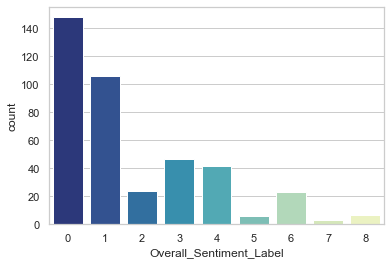

In [159]:
sns.set_style('whitegrid')
sns.countplot(x='Overall_Sentiment_Label',data=df4, palette='YlGnBu_r')

In [106]:
# Training and Testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=32,test_size=0.3)

In [107]:
# Random Forest
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_reg.fit(X_train, Y_train)
Y_pred = random_reg.predict(X_test)
Y_pred

array([3.  , 3.  , 4.  , 0.  , 1.  , 3.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 3.  , 5.04, 6.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
       6.  , 3.  , 3.  , 6.  , 1.98, 1.  , 6.  , 2.04, 1.  , 1.  , 0.  ,
       4.  , 2.  , 1.  , 4.  , 1.  , 6.  , 0.16, 4.  , 1.  , 0.  , 3.  ,
       6.  , 1.  , 0.  , 1.  , 1.98, 3.  , 2.  , 3.  , 3.  , 5.04, 1.  ,
       1.  , 4.  , 3.  , 1.  , 1.  , 0.  , 3.  , 3.  , 1.  , 0.  , 1.  ,
       0.  , 0.  , 6.  , 0.  , 3.  , 0.  , 0.16, 1.  , 0.  , 3.  , 4.  ,
       1.  , 1.  , 1.98, 1.01, 1.  , 1.  , 2.  , 1.01, 3.  , 0.  , 0.  ,
       1.  , 2.  , 4.  , 4.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
       0.  , 6.  , 6.  , 3.  , 0.16, 4.  , 0.  , 0.  , 0.  , 7.88, 4.  ,
       3.  , 3.  , 4.  , 0.  , 3.  , 2.04, 0.  , 1.  , 1.  , 0.  , 0.16,
       0.  ])

In [108]:
# Converting float data to int
Y_pred=Y_pred.astype('int')
Y_pred

array([3, 3, 4, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 3, 5, 6, 1, 0, 0, 1, 0, 0,
       6, 3, 3, 6, 1, 1, 6, 2, 1, 1, 0, 4, 2, 1, 4, 1, 6, 0, 4, 1, 0, 3,
       6, 1, 0, 1, 1, 3, 2, 3, 3, 5, 1, 1, 4, 3, 1, 1, 0, 3, 3, 1, 0, 1,
       0, 0, 6, 0, 3, 0, 0, 1, 0, 3, 4, 1, 1, 1, 1, 1, 1, 2, 1, 3, 0, 0,
       1, 2, 4, 4, 1, 0, 0, 1, 1, 1, 1, 0, 6, 6, 3, 0, 4, 0, 0, 0, 7, 4,
       3, 3, 4, 0, 3, 2, 0, 1, 1, 0, 0, 0])

In [109]:
#Accuracy
model = RandomForestRegressor()
model.fit(X_train, Y_train)
r2 = accuracy_score( Y_test,Y_pred )
r2

0.9672131147540983

In [110]:
mse = mean_squared_error(Y_pred, Y_test)
print("MSE = ",mse)
rrmse = np.sqrt(mse)
print("RMSE = ",rmse)

MSE =  0.03278688524590164
RMSE =  0.0


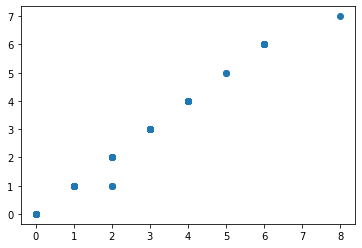

In [111]:

plt.scatter(x = Y_test, y = Y_pred)

In [112]:
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train,Y_train)

Y_pred = DecisionTreeRegModel.predict(X_test)
Y_pred

array([3., 3., 4., 0., 1., 3., 1., 1., 0., 0., 0., 0., 0., 3., 5., 6., 1.,
       0., 0., 1., 0., 0., 6., 3., 3., 6., 2., 1., 6., 2., 1., 1., 0., 4.,
       2., 1., 4., 1., 6., 0., 4., 1., 0., 3., 6., 1., 0., 1., 2., 3., 2.,
       3., 3., 5., 1., 1., 4., 3., 1., 1., 0., 3., 3., 1., 0., 1., 0., 0.,
       6., 0., 3., 0., 0., 1., 0., 3., 4., 1., 1., 2., 1., 1., 1., 2., 1.,
       3., 0., 0., 1., 2., 4., 4., 1., 0., 0., 1., 1., 1., 1., 0., 6., 6.,
       3., 0., 4., 0., 0., 0., 8., 4., 3., 3., 4., 0., 3., 2., 0., 1., 1.,
       0., 0., 0.])

In [113]:
Y_pred=Y_pred.astype('int')
Y_pred

array([3, 3, 4, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 3, 5, 6, 1, 0, 0, 1, 0, 0,
       6, 3, 3, 6, 2, 1, 6, 2, 1, 1, 0, 4, 2, 1, 4, 1, 6, 0, 4, 1, 0, 3,
       6, 1, 0, 1, 2, 3, 2, 3, 3, 5, 1, 1, 4, 3, 1, 1, 0, 3, 3, 1, 0, 1,
       0, 0, 6, 0, 3, 0, 0, 1, 0, 3, 4, 1, 1, 2, 1, 1, 1, 2, 1, 3, 0, 0,
       1, 2, 4, 4, 1, 0, 0, 1, 1, 1, 1, 0, 6, 6, 3, 0, 4, 0, 0, 0, 8, 4,
       3, 3, 4, 0, 3, 2, 0, 1, 1, 0, 0, 0])

In [114]:
dt_score = accuracy_score( Y_test,Y_pred )
dt_score

1.0

In [115]:
mse = mean_squared_error(Y_pred, Y_test)
drmse = np.sqrt(mse)
drmse

0.0

<StemContainer object of 3 artists>

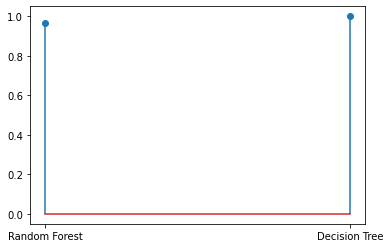

In [129]:
# Performance of random forest vs decision tree

x_axis = ['Random Forest','Decision Tree']
y_axis = [r2,dt_score]

plt.stem(x_axis,y_axis)

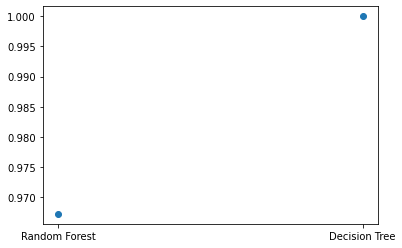

In [130]:
plt.scatter(x_axis,y_axis)